In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/TheiScale/YouTube-Video-Notes/refs/heads/main/New%20Netflix%20Data%20Analysis%20Project%202025/mymoviedb.csv'

df = pd.read_csv(url, lineterminator= '\n')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [3]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summary

- we have a dataframe consisting of 9827 rows and 9 columns.
- our dataset looks a bit tidy with no NAs nor duplicated values.
- Release_Date column needs to be casted into date time and to extract only the year value.
- Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
- there is noticeable outliers in Popularity column
- Vote_Average better be categorised for proper analysis.
- Genre column has comma separated values and white spaces that needs to be handled and casted into category.


In [6]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_year'] = df['Release_Date'].dt.year
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [7]:
df['Release_year'].dtype

dtype('int32')

Dropping the Columns

In [8]:
cols = ['Release_Date', 'Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_year
0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,6.3,Thriller,2022
3,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


# categorizing Vote_Average column
# We would cut the Vote_Average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using categorize_col() function provided above.


In [9]:
def categorize_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [10]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_year
0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,below_avg,Thriller,2022
3,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [11]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [12]:
df.dropna(inplace = True)

df.isna().sum()

Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Release_year    0
dtype: int64

In [13]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


In [14]:
# casting column into a category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25552 non-null  object  
 1   Popularity    25552 non-null  float64 
 2   Vote_Count    25552 non-null  int64   
 3   Vote_Average  25552 non-null  category
 4   Genre         25552 non-null  category
 5   Release_year  25552 non-null  int32   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


# Data Visualization

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# What is the most frequent genre of movies released on Netflix?

In [17]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

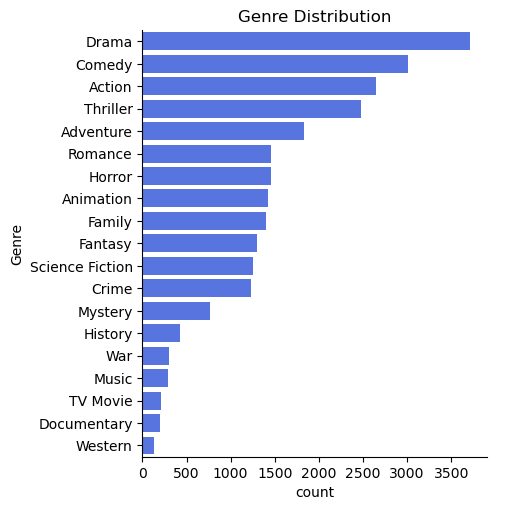

In [19]:
sns.catplot(y = 'Genre', data = df, kind='count', order=df['Genre'].value_counts().index.tolist(), color = '#4267f5')
plt.title("Genre Distribution")
plt.show()

# Which has the highest votes in vote avg column?

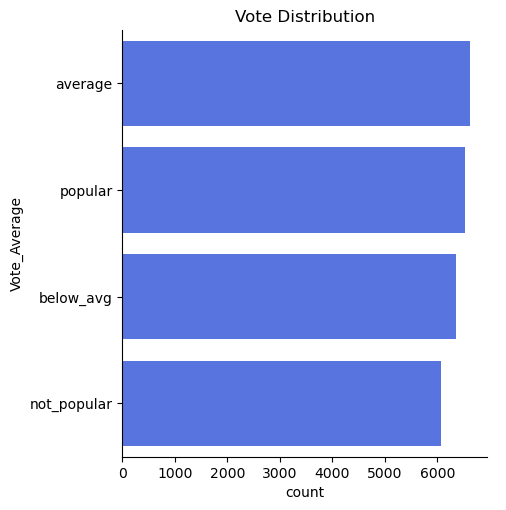

In [24]:
sns.catplot( y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4267f5')
plt.title("Vote Distribution")
plt.show()

# WHat movie got the highest popularity? what's it's genre?

In [29]:
df[df['Popularity'] == df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


# What movie got the lowest popularity? what's it's genre?

In [30]:
df[df['Popularity'] == df['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_year
25546,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25547,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25548,The United States vs. Billie Holiday,13.354,152,average,History,2021
25549,Threads,13.354,186,popular,War,1984
25550,Threads,13.354,186,popular,Drama,1984
25551,Threads,13.354,186,popular,Science Fiction,1984


# Which year has the most filmed movies?

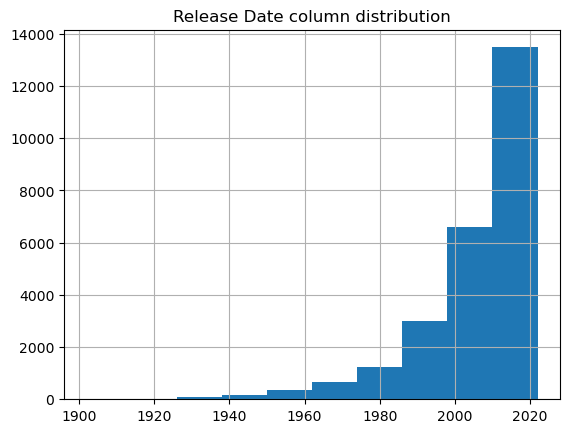

In [33]:
df['Release_year'].hist()
plt.title("Release Date column distribution")
plt.show()